# <a href="https://thetahat.ru/courses/python">Python для анализа данных</a>

In [1]:
import numpy as np

# Библиотека `numpy`

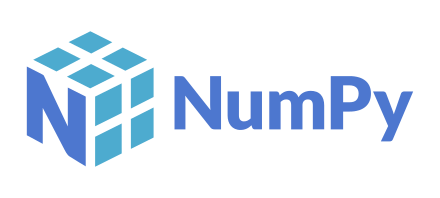

Пакет `numpy` предоставляет $n$-мерные однородные массивы (все элементы одного типа); в них нельзя вставить или удалить элемент в произвольном месте. В `numpy` реализовано много операций над массивами в целом. Если задачу можно решить, произведя некоторую последовательность операций над массивами, то это будет столь же эффективно, как в `C` или `matlab` — львиная доля времени тратится в библиотечных функциях, написанных на `C`.


## 1. Одномерные массивы

#### 1.1 Типы массивов, атрибуты

Можно преобразовать список в массив.

In [2]:
a = np.array([5, 7, -3, 4, 2, -4])
a, type(a)

(array([ 5,  7, -3,  4,  2, -4]), numpy.ndarray)

#### 1.2 Индексация

Индексировать массив можно обычным образом.

In [3]:
a[1]

np.int64(7)

Массивы — изменяемые объекты.

In [4]:
a[1] = 3
print(a)

[ 5  3 -3  4  2 -4]


Хотим удалить из него отрицательные значения.

In [5]:
print(a > 0)
print(a[a > 0])

[ True  True False  True  True False]
[5 3 4 2]


Кроме того, отфильтрованные значения можно заполнить, например, нулями.

In [6]:
a[a < 0] = 0
print(a)

[5 3 0 4 2 0]


#### 1.3 Создание массивов

Массивы, заполненные нулями или единицами. Часто лучше сначала создать такой массив, а потом присваивать значения его элементам.

In [7]:
a = np.zeros(3)
b = np.ones(3, dtype=np.int64)
print(a)
print(b)

[0. 0. 0.]
[1 1 1]


Функция `arange` подобна `range`. Аргументы могут быть с плавающей точкой. Следует избегать ситуаций, когда *(конец-начало)/шаг* — целое число, потому что в этом случае включение последнего элемента зависит от ошибок округления. Лучше, чтобы конец диапазона был где-то посредине шага.

In [8]:
a = np.arange(0, 9, 2)
b = np.arange(0., 9, 2)
print(a)
print(b)

[0 2 4 6 8]
[0. 2. 4. 6. 8.]


Последовательности чисел с постоянным шагом можно также создавать функцией `linspace`. Начало и конец диапазона включаются; последний аргумент — число точек.

In [9]:
a = np.linspace(0, 8, 5)
print(a)

[0. 2. 4. 6. 8.]


Функция `np.random.random()`.
Данная функция создает массив указанной формы и заполняет его случайными числами с плавающей точкой из непрерывного равномерного распределения в интервале [0, 1).

In [10]:
np.random.random(5)

array([0.28194415, 0.10660636, 0.3367799 , 0.66343749, 0.79696398])

Функция `np.random.choice`.
Генерирует случайную выборку из заданного одномерного массива.

In [11]:
np.random.choice(10, 4)

array([6, 9, 1, 5])

In [12]:
np.random.choice(10, 7, replace=True)

array([5, 0, 8, 3, 2, 2, 0])

In [13]:
a = ['spam', 'foo', 'bar']
np.random.choice(a, 2)

array(['foo', 'bar'], dtype='<U4')

## 2. Операции над одномерными массивами

#### 2.1 Математические операции

Арифметические операции проводятся поэлементно.

In [14]:
a = np.array([0, 2, 1])
b = np.array([3, 2, 5])

print(a + b)
print(a - b)
print(a * b)
print(a / b)
print(a + 1)
print(2 * a)
print(a ** 2)

[3 4 6]
[-3  0 -4]
[0 4 5]
[0.  1.  0.2]
[1 3 2]
[0 4 2]
[0 4 1]


Библиотека `numpy` содержит элементарные функции, которые тоже применяются к массивам поэлементно.

In [15]:
print(np.sin(a))

[0.         0.90929743 0.84147098]


Сравнения дают булевы массивы.

In [16]:
print(a > b)
print(a == b)

[False False False]
[False  True False]


Кванторы "существует" и "для всех".

In [17]:
np.any(a == b), np.all(a == b)

(np.True_, np.False_)

Модификация на месте.

In [18]:
print(a)
a += 1
print(a)

[0 2 1]
[1 3 2]


In [19]:
print(b)
b *= 2
print(b)

[3 2 5]
[ 6  4 10]


При выполнении операций над массивами деление на 0 не возбуждает исключения, а даёт значения `np.nan` или `np.inf`.

In [20]:
print(np.array([0.0, 0.0, 1.0, -1.0]) / np.array([1.0, 0.0, 0.0, 0.0]))

[  0.  nan  inf -inf]


/tmp/ipykernel_28824/3088186758.py:1: RuntimeWarning: divide by zero encountered in divide
  print(np.array([0.0, 0.0, 1.0, -1.0]) / np.array([1.0, 0.0, 0.0, 0.0]))
/tmp/ipykernel_28824/3088186758.py:1: RuntimeWarning: invalid value encountered in divide
  print(np.array([0.0, 0.0, 1.0, -1.0]) / np.array([1.0, 0.0, 0.0, 0.0]))


In [21]:
np.nan + 1, np.inf + 1, np.inf * 0, 1. / np.inf

(nan, inf, nan, 0.0)

Сумма и произведение всех элементов массива; максимальный и минимальный элемент; среднее и среднеквадратичное отклонение.

In [22]:
print(b)
b.sum(), b.prod(), b.max(), b.min(), b.mean(), b.std()

[ 6  4 10]


(np.int64(20),
 np.int64(240),
 np.int64(10),
 np.int64(4),
 np.float64(6.666666666666667),
 np.float64(2.494438257849294))

Имеются встроенные функции.

In [23]:
print(np.sqrt(b))
print(np.exp(b))
print(np.log(b))
print(np.sin(b))
print(np.e, np.pi)

[2.44948974 2.         3.16227766]
[  403.42879349    54.59815003 22026.46579481]
[1.79175947 1.38629436 2.30258509]
[-0.2794155  -0.7568025  -0.54402111]
2.718281828459045 3.141592653589793


Иногда бывает нужно использовать частичные (кумулятивные) суммы. В наших курсах такое может пригодиться.

In [24]:
print(b.cumsum())

[ 6 10 20]


#### 2.2 Сортировка, изменение массивов

Функция `sort` возвращает отсортированную копию, метод `sort` сортирует на месте.

In [25]:
print(b)
print(np.sort(b))
print(b)

[ 6  4 10]
[ 4  6 10]
[ 6  4 10]


In [26]:
print(b)
b.sort()
print(b)

[ 6  4 10]
[ 4  6 10]


Объединение массивов.

In [27]:
print(a)
print(b)
a = np.hstack((a, b))
print(a)

[1 3 2]
[ 4  6 10]
[ 1  3  2  4  6 10]


#### 2.3 Способы индексации массивов

Есть несколько способов индексации массива. Вот обычный индекс.

In [28]:
a = np.linspace(0, 1, 11)
print(a)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [29]:
print(a[2])

0.2


Диапазон индексов. Создаётся новый заголовок массива, указывающий на те же данные. Изменения, сделанные через такой массив, видны и в исходном массиве.

In [30]:
b = a[2:6]
print(b)

b[0] = -0.2
print(b)

print(a)

[0.2 0.3 0.4 0.5]
[-0.2  0.3  0.4  0.5]
[ 0.   0.1 -0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]


Диапазон с шагом 2.

In [31]:
b = a[1:10:2]
print(b)

[0.1 0.3 0.5 0.7 0.9]


Массив в обратном порядке.

In [32]:
b = a[::-1]
print(b)

[ 1.   0.9  0.8  0.7  0.6  0.5  0.4  0.3 -0.2  0.1  0. ]


Чтобы скопировать и данные массива, нужно использовать метод `copy`.

In [33]:
b = a.copy()
b[2] = 0
print(b)
print(a)

[0.  0.1 0.  0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[ 0.   0.1 -0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]


Можно задать список индексов.

In [34]:
print(a[[2, 3, 5]])

[-0.2  0.3  0.5]


Можно задать булев массив той же величины.

In [35]:
b = a > 0
print(b)

[False  True False  True  True  True  True  True  True  True  True]


In [36]:
print(a[b])
print(a)
print(b)

[0.1 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[ 0.   0.1 -0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]
[False  True False  True  True  True  True  True  True  True  True]


## 3. Двумерные массивы

#### 3.1 Создание, простые операции

In [37]:
a = np.array([[0.0, 1.0], [-1.0, 0.0]])
print(a)
print(a[1, 0])

[[ 0.  1.]
 [-1.  0.]]
-1.0


In [38]:
a.shape

(2, 2)

In [39]:
len(a)

2

Можно растянуть в одномерный массив.

In [40]:
print(a.ravel())

[ 0.  1. -1.  0.]


Арифметические операции поэлементные.

In [41]:
print(a + 1)
print(a * 2)
print(a + [0, 1])  # второе слагаемое дополняется до матрицы копированием строк
print(a + np.array([[0, 2]]).T)  # .T - транспонирование

b = np.array([[1.0, -5.0], [-3.0, 8.0]])
print(a + b)

[[1. 2.]
 [0. 1.]]
[[ 0.  2.]
 [-2.  0.]]
[[ 0.  2.]
 [-1.  1.]]
[[0. 1.]
 [1. 2.]]
[[ 1. -4.]
 [-4.  8.]]


#### 3.2 Работа с матрицами

Поэлементное и матричное умножение.

In [42]:
print(a * b)

[[ 0. -5.]
 [ 3.  0.]]


In [43]:
print(a @ b)

[[-3.  8.]
 [-1.  5.]]


In [44]:
print(b @ a)

[[ 5.  1.]
 [-8. -3.]]


Единичная матрица.

In [45]:
I = np.eye(4)
print(I)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


Метод `reshape`.

In [46]:
print(I.reshape(16))

[1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]


In [47]:
print(I.reshape(2, 8))

[[1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1.]]


Строка.

In [48]:
print(I[1])

[0. 1. 0. 0.]


Столбец.

In [49]:
print(I[:, 2])

[0. 0. 1. 0.]


Подматрица.

In [50]:
print(I[0:2, 1:3])

[[0. 0.]
 [1. 0.]]


Транспонированная матрица.

In [51]:
print(b.T)

[[ 1. -3.]
 [-5.  8.]]


Соединение матриц по горизонтали и по вертикали.

In [52]:
a = np.array([[0, 1], [2, 3]])
b = np.array([[4, 5, 6], [7, 8, 9]])
c = np.array([[4, 5], [6, 7], [8, 9]])
print(a)
print(b)
print(c)

[[0 1]
 [2 3]]
[[4 5 6]
 [7 8 9]]
[[4 5]
 [6 7]
 [8 9]]


In [53]:
print(np.hstack((a, b)))

[[0 1 4 5 6]
 [2 3 7 8 9]]


In [54]:
print(np.vstack((a, c)))

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]


Сумма всех элементов; суммы столбцов; суммы строк.

In [55]:
b

array([[4, 5, 6],
       [7, 8, 9]])

In [56]:
print(b.sum())
print(b.sum(axis=0))
print(b.sum(axis=1))

39
[11 13 15]
[15 24]


Аналогично работают `prod`, `max`, `min` и т.д.

In [57]:
print(b.max())
print(b.max(axis=0))
print(b.min(axis=1))

9
[7 8 9]
[4 7]


След - сумма диагональных элементов.

In [58]:
np.trace(a)

np.int64(3)

## 4. Тензоры (многомерные массивы)

#### 4.1 Создание, простые операции

In [59]:
X = np.arange(24).reshape(2, 3, 4)
print(X)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


Суммирование (аналогично остальные операции).

In [60]:
# суммируем только по нулевой оси, то есть для фиксированных j и k 
# суммируем только элементы с индексами (*, j, k)
print(X.sum(axis=0))

[[12 14 16 18]
 [20 22 24 26]
 [28 30 32 34]]


In [61]:
# суммируем сразу по двум осям, то есть для фиксированной i 
# суммируем только элементы с индексами (i, *, *)
print(X.sum(axis=(1, 2)))

[ 66 210]


#### 4.2. Broadcasting

Выше при арифметических операциях с массивами, например, при сложении и умножении, мы перемножали массивы одинаковой формы. В самом простом случае операндами были одномерные массивы одинаковой длины.

In [62]:
# Самый простой случай
a = np.array([1, 2, 3])
b = np.array([2, 2, 2])
print(a * b)

[2 4 6]


Произошло поэлементное умножение, все элементы массива $a$ умножились на $2$. Но мы знаем, что это можно сделать проще, просто умножив массив на $2$.

In [63]:
# Умножение массива на число
print(a * 2)

[2 4 6]


На самом деле поведение будет аналогичным, если умножить одномерный массив на массив длины $1$.

In [64]:
# Умножение массивов разных длин
print(a * [2])

[2 4 6]


В этом случае работает так называемый *broadcasting*. Один массив "растягивается", чтобы повторить форму другого.

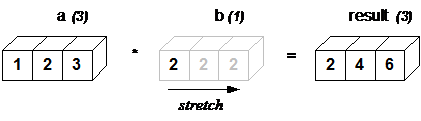

Такой же эффект работает и для многомерных массивов. Если по какому-то измерению размер у одного массива равен $1$, а у другого — произвольный, то по этому измерению может произойти "рястяжение". Таким образом, массивы можно умножать друг на друга, если в измерениях, где они по размеру не совпадают, хотя бы у одного размер $1$. Для других поэлементных операций правило аналогично.

Важно отметить, что размерности сопоставляются справа налево. Если их количество не совпадает, то массивы меньшей размерности сначала дополняются слева размерностями 1. Например, при сложении массива размера $4 \times 3$ с массивом размера $3$ последний сначала преобразуется в массив размера $1 \times 3$.

In [65]:

a = np.array([[ 0,  0,  0],
              [10, 10, 10],
              [20, 20, 20],
              [30, 30, 30]])

b = np.array([0, 1, 2])

print(a + b)

[[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]


Схематично проведенную операцию можно визуализировать следующим образом.

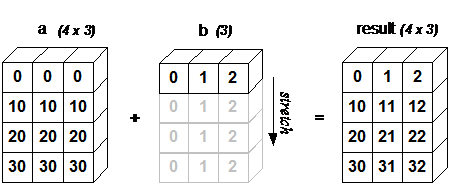


Если неединичные размерности справа не будут совпадать, то выполнить операцию уже не получится. Например, как приведено на схеме ниже. 

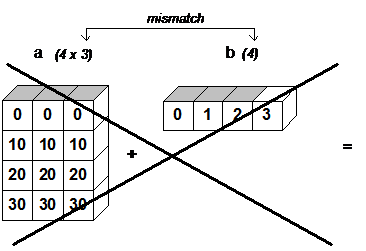


А если размеры будут не совместимы, то произойдет ошибка.

In [66]:
b = np.array([1.0, 2.0, 3.0, 4.0])
a + b

ValueError: operands could not be broadcast together with shapes (4,3) (4,) 

Если массивы имеют несовместимый размер, можно их сначала привести к одной форме.

In [67]:
a = np.array([0.0, 10.0, 20.0, 30.0])
b = np.array([1.0, 2.0, 3.0])
a.reshape((-1, 1)) + b

array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

*Замечание*

Знать про broadcasting нужно, но пользоваться им надо с осторожностью. Многократное копирование массива при растяжении может привести к неэффективной работе программы по памяти. Особенно за этим приходится следить при работе с GPU.

Часто при работе с массивами NumPy требуется добавлять новые оси измерений и удалять существующие. В NumPy добавлять новые оси иногда удобнее с помощью специального объекта `newaxis`. Например, пусть у нас есть одномерный массив:

In [68]:
a = np.array([1,2,3,4,5,6,7,8,9,10])

У него одна ось – одно измерение. Добавим еще одну ось, допустим, в начало. С помощью объекта np.newaxis это можно сделать так:

In [69]:
b = a[np.newaxis, :] # добавление оси axis0
b.shape

(1, 10)

Или, можно прописать сразу две оси:

In [70]:
c = a[np.newaxis, :, np.newaxis]
c.shape

(1, 10, 1)

## 5. Линейная алгебра

In [71]:
a = np.array([[0, 1], [2, 3]])

In [72]:
np.linalg.det(a)

np.float64(-2.0)

Обратная матрица.

In [73]:
a1 = np.linalg.inv(a)
print(a1)

[[-1.5  0.5]
 [ 1.   0. ]]


In [74]:
print(a @ a1)
print(a1 @ a)

[[1. 0.]
 [0. 1.]]
[[1. 0.]
 [0. 1.]]


In [4]:
a = np.array([[1e-9, 0],[0, 0]])
np.linalg.inv(a)

LinAlgError: Singular matrix

## 6. Производительность numpy

Посмотрим на простой пример — сумма первых $10^8$ чисел.

In [75]:
%%time

sum_value = 0
for i in range(10 ** 8):
    sum_value += i
print(sum_value)

4999999950000000
CPU times: user 12.4 s, sys: 1.79 ms, total: 12.4 s
Wall time: 12.4 s


Немного улучшенный код.

In [76]:
%%time

sum_value = sum(range(10 ** 8))
print(sum_value)

4999999950000000
CPU times: user 2.63 s, sys: 8.12 ms, total: 2.64 s
Wall time: 2.62 s


Код с использованием функций библиотеки `numpy`.

In [77]:
%%time

sum_value = np.arange(10 ** 8).sum()
print(sum_value)

4999999950000000
CPU times: user 103 ms, sys: 78.1 ms, total: 181 ms
Wall time: 192 ms


Простой и понятный код работает в $60$ раз быстрее!

Посмотрим на другой пример. Сгенерируем матрицу размера $500\times1000$, и вычислим средний минимум по колонкам.

Простой код, но при этом даже использующий некоторые питон-функции.

*Замечание*. Далее с помощью `scipy.stats` происходит генерация случайных чисел из равномерного распределения на отрезке $[0, 1]$. Этот модуль будем изучать в следующем ноутбуке.

In [78]:
import scipy.stats as sps

In [79]:
%%time

N, M = 500, 1000
matrix = []
for i in range(N):
    matrix.append([sps.uniform.rvs() for j in range(M)])

min_col = [min([matrix[i][j] for i in range(N)]) for j in range(M)]
mean_min = sum(min_col) / N
print(mean_min)

0.003937677101331695
CPU times: user 13.2 s, sys: 86.1 ms, total: 13.2 s
Wall time: 13.2 s


Понятный код с использованием функций библиотеки numpy.

In [80]:
%%time

N, M = 500, 1000
matrix = sps.uniform.rvs(size=(N, M))
mean_min = matrix.min(axis=1).mean()
print(mean_min)

0.0010190658049421483
CPU times: user 14.3 ms, sys: 2.98 ms, total: 17.2 ms
Wall time: 16.1 ms


Простой и понятный код работает в 800 раз быстрее!